In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

/Users/Xianbo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('countytable.csv' , index_col=0 )

In [3]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,trumpp
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,0.754018
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,0.798123
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,27.0,0,0,188337,6334,0,8,884.88,31.0,0.528359
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,0.782270
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,0.913855


In [4]:
data = data.rename(columns = {'AFN120207': 'AccomFoodSales',
 'AGE135214': 'AgeUnder5Perc',
 'AGE295214': 'AgeUnder18Perc',
 'AGE775214': 'AgeOver65Perc',
 'BPS030214': 'BuildingPermits',
 'BZA010213': 'PrivateEstabs',
 'BZA110213': 'PrivateEmploy',
 'BZA115213': 'PrivateEmployPerChange',
 'EDU635213': 'HSGradOrHigherPerc',
 'EDU685213': "BacherlorsOrHigherPerc",
 'HSD310213': 'PersonsPerHousehold',
 'HSD410213': 'Households',
 'HSG010214': 'HousingUnits',
 'HSG096213': 'HousingUnitsInMulti',
 'HSG445213': 'HomeownershipRate',
 'HSG495213': 'MedianHousingValue',
 'INC110213': 'MedianHHIncome',
 'INC910213': 'PerCapitaIncomePastYear',
 'LFE305213': 'MeanTravelTimeToWork',
 'LND110210': 'LandArea',
 'MAN450207': 'ManufactShipments',
 'NES010213': 'NonemployerEstabls',
 'POP010210': 'Population2010',
 'POP060210': 'PopulationPerSquareMile2010',
 'POP645213': 'ForeignBornPerc',
 'POP715213': 'LiveSameHouseOneYearPerc',
 'POP815213': 'OtherLanguagePerc',
 'PST040210': 'Population2010EstimatesBase',
 'PST045214': 'Population2014',
 'PST120214': 'PopulationPercChange',
 'PVY020213': 'PercBelowPoverty',
 'RHI125214': 'WhitePerc',
 'RHI225214': 'BlackPerc',
 'RHI325214': 'AIANPerc',
 'RHI425214': 'AsianPerc',
 'RHI525214': 'NHPIPerc',
 'RHI625214': 'TwoOrMorePerc',
 'RHI725214': 'HispPerc',
 'RHI825214': 'NonHispWhitePerc',
 'RTN130207': 'RetailSales',
 'RTN131207': 'RetailSalesPerCapita',
 'SBO001207': 'NoOfFirms',
 'SBO015207': 'PercFirmsWomenOwned',
 'SBO115207': 'PercFirmsAIANOwned',
 'SBO215207': 'PercFirmsAsianOwned',
 'SBO315207': 'PercFirmsBlackOwned',
 'SBO415207': 'PercFirmsHispOwned',
 'SBO515207': 'PercFirmsNHPIOwned',
 'SEX255214': 'PercWomen',
 'VET605213': 'Veterans',
 'WTN220207': 'MerchantWholesalerSales'})

In [5]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population2014', u'Population2010EstimatesBase',
       u'PopulationPercChange', u'Population2010', u'AgeUnder5Perc',
       u'AgeUnder18Perc', u'AgeOver65Perc', u'PercWomen', u'WhitePerc',
       u'BlackPerc', u'AIANPerc', u'AsianPerc', u'NHPIPerc', u'TwoOrMorePerc',
       u'HispPerc', u'NonHispWhitePerc', u'LiveSameHouseOneYearPerc',
       u'ForeignBornPerc', u'OtherLanguagePerc', u'HSGradOrHigherPerc',
       u'BacherlorsOrHigherPerc', u'Veterans', u'MeanTravelTimeToWork',
       u'HousingUnits', u'HomeownershipRate', u'HousingUnitsInMulti',
       u'MedianHousingValue', u'Households', u'PersonsPerHousehold',
       u'PerCapitaIncomePastYear', u'MedianHHIncome', u'PercBelowPoverty',
       u'PrivateEstabs', u'PrivateEmploy', u'PrivateEmployPerChange',
       u'NonemployerEstabls', u'NoOfFirms', u'PercFirmsBlackOwned',
       u'PercFirmsAIANOwned', u'PercFirmsAsianOwned', u'PercFirmsNHPIOwned',

In [6]:
#change Veterans to percentage
data['Veterans'] = data['Veterans'] / data['Population2014']
data = data.rename(columns = {'Veterans': 'Veteransperc'})

In [7]:
data = data.drop(['processed', 'area_name'], axis = 1) 
data = data.drop(['Population2010EstimatesBase', 'Population2010'], axis = 1) 
#Using population2014 data for analysis
#delete other population data since we have percchange already

In [8]:
data.iloc[:,:].columns

Index([u'trump', u'clinton', u'state_abbreviation', u'Population2014',
       u'PopulationPercChange', u'AgeUnder5Perc', u'AgeUnder18Perc',
       u'AgeOver65Perc', u'PercWomen', u'WhitePerc', u'BlackPerc', u'AIANPerc',
       u'AsianPerc', u'NHPIPerc', u'TwoOrMorePerc', u'HispPerc',
       u'NonHispWhitePerc', u'LiveSameHouseOneYearPerc', u'ForeignBornPerc',
       u'OtherLanguagePerc', u'HSGradOrHigherPerc', u'BacherlorsOrHigherPerc',
       u'Veteransperc', u'MeanTravelTimeToWork', u'HousingUnits',
       u'HomeownershipRate', u'HousingUnitsInMulti', u'MedianHousingValue',
       u'Households', u'PersonsPerHousehold', u'PerCapitaIncomePastYear',
       u'MedianHHIncome', u'PercBelowPoverty', u'PrivateEstabs',
       u'PrivateEmploy', u'PrivateEmployPerChange', u'NonemployerEstabls',
       u'NoOfFirms', u'PercFirmsBlackOwned', u'PercFirmsAIANOwned',
       u'PercFirmsAsianOwned', u'PercFirmsNHPIOwned', u'PercFirmsHispOwned',
       u'PercFirmsWomenOwned', u'ManufactShipments',
     

In [9]:
data_preprocess = data.copy()

In [10]:
#groupby the dataset and calculated the weighted average based on population
for i in range(4,len(data_preprocess.columns)):
    data_preprocess.iloc[:,i] = data_preprocess.iloc[:,i] * data_preprocess['Population2014']
data_preprocess = data_preprocess.groupby('state_abbreviation').sum()
del data_preprocess.index.name
for i in range(4,len(data_preprocess.columns)):
    data_preprocess.iloc[:,i] = data_preprocess.iloc[:,i] / data_preprocess['Population2014']

In [11]:
data_preprocess['trumpp'] = data_preprocess['trump'] / (data_preprocess['trump'] + data_preprocess['clinton'])

In [12]:
# Analyze data which can be converted into percentage level first.
# Analysis of whole data set 

In [13]:
data_perc = data_preprocess.drop(['Population2014', 'HousingUnits', 'MedianHousingValue',
                                  'Households', 'MeanTravelTimeToWork', 'MedianHousingValue', 'Households', 
                                  'PerCapitaIncomePastYear', 'MedianHHIncome', 'PrivateEstabs', 'PrivateEmploy', 
                                  'NonemployerEstabls', 'NoOfFirms', 'ManufactShipments', 'MerchantWholesalerSales',
                                  'RetailSales', 'RetailSalesPerCapita', 'AccomFoodSales', 'BuildingPermits', 
                                  'LandArea', 'PopulationPerSquareMile2010'], axis = 1)

In [14]:
data_perc.iloc[:,3:].head()

,AgeUnder5Perc,AgeUnder18Perc,AgeOver65Perc,PercWomen,WhitePerc,BlackPerc,AIANPerc,AsianPerc,NHPIPerc,TwoOrMorePerc,...,PersonsPerHousehold,PercBelowPoverty,PrivateEmployPerChange,PercFirmsBlackOwned,PercFirmsAIANOwned,PercFirmsAsianOwned,PercFirmsNHPIOwned,PercFirmsHispOwned,PercFirmsWomenOwned,trumpp
AL,6.078931,22.833051,15.336851,51.545435,69.647735,26.667762,0.685701,1.332658,0.112922,1.543919,...,2.552505,18.534983,1.525508,12.435789,0.434078,1.308692,0.012724,0.705059,25.335852,0.645392
AR,6.399658,23.547024,15.980816,50.951289,79.131208,16.498835,0.888356,1.317659,0.289027,1.899635,...,2.513496,19.689976,-0.240521,4.826523,0.473395,0.911724,0.000000,1.276653,19.673119,0.639032
AZ,6.413927,24.127163,15.861680,50.333908,83.758389,4.698832,5.342217,3.292428,0.271758,2.694021,...,2.685211,17.872260,1.522481,1.921034,1.959017,3.117205,0.000000,10.636121,27.341304,0.521688
CA,6.495129,23.576849,12.894498,50.331970,73.231044,6.543452,1.665538,14.365675,0.511667,3.711859,...,2.954712,15.920302,3.137423,3.866566,0.932438,13.827564,0.209203,16.492766,29.917096,0.650279
CO,6.252508,23.298173,12.702132,49.761602,87.710776,4.475335,1.581485,3.137694,0.183252,2.868386,...,2.544092,13.236393,2.492019,1.644845,0.632953,2.625565,0.024008,5.858778,28.022347,0.516205


In [15]:
y = data_perc.trumpp
X = data_perc.iloc[:,3:-1]

In [16]:
#PCA

In [17]:
n = data_perc.iloc[:,3:-1].shape[1]

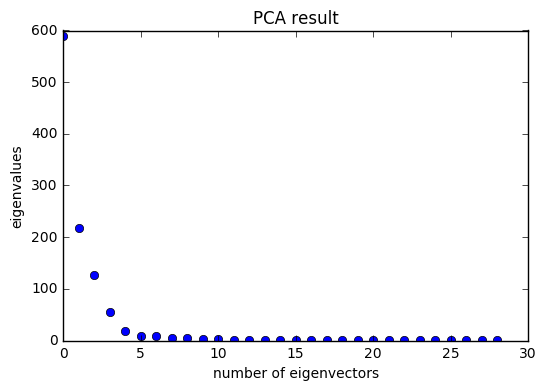

In [18]:
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
plt.plot(range(n), eigenvalues, 'o');
title('PCA result')
xlabel('number of eigenvectors')
ylabel('eigenvalues')

In [19]:
print "Total varaince is: {}".format(np.var(X,0).sum())
pca = PCA(0.9)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print("we need {} eigenvectors".format(len(Xproj.T)))

Total varaince is: 1045.37761627
we need 4 eigenvectors


In [20]:
pcadata = pd.DataFrame(Xproj, columns = ['x0','x1','x2','x3'])
pcadata['y'] = y.values

In [21]:
lm = smf.ols(formula='y ~ x0 + x1 + x2 + x3', data = pcadata).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.315
Date:                Thu, 15 Dec 2016   Prob (F-statistic):             0.0222
Time:                        21:45:10   Log-Likelihood:                 55.308
No. Observations:                  37   AIC:                            -100.6
Df Residuals:                      32   BIC:                            -92.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5960      0.010     62.118      0.000         0.576     0.615
x0            -0.0005      0.000     -1.326      0.194        -0.001     0.000
x1             0.0004      0.001      0.687      0.497        -0.001     0.002
x2             0.0018      0.001      2.152      0.039      9.74e-05     0.004
x3             0.0033      0.001      2.530      0.017         0.001     0.006
==============================================================================
Omnibus:                        2.623   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.365
Skew:                          -0.039   Prob(JB):                        0.505
Kurtosis:                       2.062   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#LassoCV

In [24]:
laresult = linear_model.LassoCV(alphas=[0.025/2], random_state=100)
lafactor = X.columns[list(laresult.fit(X, y).coef_ != 0)]

In [25]:
OSR2collect = []
ISR2collect = []
X_train, X_test, y_train, y_test = train_test_split(X,
                                   y, test_size = 0.4, random_state = 100)
laresult = linear_model.LassoCV(alphas=[0.0082/2], random_state = 100)
lafactor = X.columns[list(laresult.fit(X_train, y_train).coef_ != 0)]
y_predict = laresult.predict(X_test)
SST = ((y_predict - y_test.mean())**2).sum()
SSR = ((y_test - y_predict)**2).sum()
OSR2 = 1 - SSR/SST
OSR2collect.append(OSR2)

y_predict = laresult.predict(X_train)
SST = ((y_predict - y_train.mean())**2).sum()
SSR = ((y_train - y_predict)**2).sum()
ISR2 = 1 - SSR/SST
ISR2collect.append(ISR2)

In [26]:
ISR2collect

[0.76928772687170177]

In [27]:
OSR2collect

[0.47691905200848883]

In [28]:
lafactor

Index([u'BlackPerc', u'AIANPerc', u'NonHispWhitePerc',
       u'LiveSameHouseOneYearPerc', u'ForeignBornPerc', u'HSGradOrHigherPerc',
       u'BacherlorsOrHigherPerc', u'HomeownershipRate', u'HousingUnitsInMulti',
       u'PercBelowPoverty', u'PrivateEmployPerChange', u'PercFirmsBlackOwned',
       u'PercFirmsAsianOwned', u'PercFirmsHispOwned', u'PercFirmsWomenOwned'],
      dtype='object')

In [29]:
list(laresult.fit(X_train, y_train).coef_)

[0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.009584644234009957,
 0.0037577458520168245,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0029632275190657727,
 0.0018741815504467521,
 -0.0026784698454964612,
 -0.0,
 -0.0076959335681466715,
 -0.0061503667823114639,
 0.0,
 -0.0055844923217590872,
 -0.00033421786184828175,
 0.0,
 -0.014329148911596718,
 0.0064879209452619619,
 0.013956312371295364,
 0.0,
 0.0017575647775363958,
 0.0,
 -0.0074118952054925639,
 -0.01293433439247404]

In [30]:
lassoresult = pd.DataFrame(X.columns, columns = ['para'])
lassoresult['coef'] = list(laresult.fit(X_train, y_train).coef_)
lassoresult['abscoef'] = lassoresult['coef'].abs()
result = lassoresult.sort(columns = 'abscoef', ascending = 0)
result[result['coef'] != 0].iloc[:,:2]

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,para,coef
21,PercBelowPoverty,-0.014329
23,PercFirmsBlackOwned,0.013956
28,PercFirmsWomenOwned,-0.012934
5,BlackPerc,-0.009585
15,HSGradOrHigherPerc,-0.007696
27,PercFirmsHispOwned,-0.007412
22,PrivateEmployPerChange,0.006488
16,BacherlorsOrHigherPerc,-0.006150
18,HomeownershipRate,-0.005584
6,AIANPerc,0.003758


In [31]:
lafactor = X.columns[list(laresult.fit(X, y).coef_ != 0)]

In [32]:
# The following codes are analysis for the whole dataset, which includes all the factors.

In [33]:
data_nonperc = data_preprocess[['Population2014', 'HousingUnits', 'MedianHousingValue',
                                'Households', 'MeanTravelTimeToWork', 'MedianHousingValue', 'Households', 
                                'PerCapitaIncomePastYear', 'MedianHHIncome', 'PrivateEstabs', 'PrivateEmploy', 
                                'NonemployerEstabls', 'NoOfFirms', 'ManufactShipments', 'MerchantWholesalerSales',
                                'RetailSales', 'RetailSalesPerCapita', 'AccomFoodSales', 'BuildingPermits', 
                                'LandArea', 'PopulationPerSquareMile2010']]

In [34]:
for i in range (0, len(data_nonperc)):
    data_nonperc.iloc[i,:] = (data_nonperc.iloc[i,:] - data_nonperc.mean()) / (data_nonperc.max() - data_nonperc.min()) * 100

/Users/Xianbo/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Xianbo/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [35]:
data_perc['ind'] = data_perc.index

In [36]:
data_nonperc['ind'] = data_nonperc.index

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
data_all = pd.merge(right = data_perc.iloc[:,2:], left = data_nonperc, left_on = 'ind', right_on = 'ind', how = 'inner')
data_all.index = data_nonperc.index

In [38]:
data_all.head()

,Population2014,HousingUnits,MedianHousingValue,Households,MeanTravelTimeToWork,MedianHousingValue,Households,PerCapitaIncomePastYear,MedianHHIncome,PrivateEstabs,...,PersonsPerHousehold,PercBelowPoverty,PrivateEmployPerChange,PercFirmsBlackOwned,PercFirmsAIANOwned,PercFirmsAsianOwned,PercFirmsNHPIOwned,PercFirmsHispOwned,PercFirmsWomenOwned,trumpp
AL,-5.586435,-10.527224,-15.658762,-10.419825,2.788230,-15.658762,-10.419825,-18.214424,-20.386078,-10.480121,...,2.552505,18.534983,1.525508,12.435789,0.434078,1.308692,0.012724,0.705059,25.335852,0.645392
AR,-10.675847,-13.722341,-14.947916,-13.294568,-5.821104,-14.947916,-13.294568,-11.376573,-13.698759,-12.274431,...,2.513496,19.689976,-0.240521,4.826523,0.473395,0.911724,0.000000,1.276653,19.673119,0.639032
AZ,-0.117792,66.065725,-3.282821,59.488872,5.595023,-3.282821,59.488872,-0.794552,-0.810369,44.976913,...,2.685211,17.872260,1.522481,1.921034,1.959017,3.117205,0.000000,10.636121,27.341304,0.521688
CA,83.045894,84.647544,41.204166,85.148591,13.668001,41.204166,85.148591,11.844033,15.405079,86.110588,...,2.954712,15.920302,3.137423,3.866566,0.932438,13.827564,0.209203,16.492766,29.917096,0.650279
CO,-0.949786,0.358462,14.502489,0.846620,7.465362,14.502489,0.846620,18.069228,14.808179,2.234457,...,2.544092,13.236393,2.492019,1.644845,0.632953,2.625565,0.024008,5.858778,28.022347,0.516205


In [39]:
data_all = data_all.drop('ind', axis = 1)

In [40]:
#y = data_nonperc.trumpp
X = data_all.iloc[:,:-1]

In [41]:
laresult = linear_model.LassoCV(alphas=[0.025/2], random_state=100)
lafactor = X.columns[list(laresult.fit(X, y).coef_ != 0)]

/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [42]:
OSR2collect = []
ISR2collect = []
X_train, X_test, y_train, y_test = train_test_split(X,
                                   y, test_size = 0.4, random_state = 100)
laresult = linear_model.LassoCV(alphas=[0.00020/2], random_state=100)
lafactor = X.columns[list(laresult.fit(X_train, y_train).coef_ != 0)]
y_predict = laresult.predict(X_test)
SST = ((y_predict - y_test.mean())**2).sum()
SSR = ((y_test - y_predict)**2).sum()
OSR2 = 1 - SSR/SST
OSR2collect.append(OSR2)

y_predict = laresult.predict(X_train)
SST = ((y_predict - y_train.mean())**2).sum()
SSR = ((y_train - y_predict)**2).sum()
ISR2 = 1 - SSR/SST
ISR2collect.append(ISR2)

In [43]:
ISR2collect


[0.99984026450592756]

In [44]:
OSR2collect

[0.23651644001758332]

In [45]:
lassoresult = pd.DataFrame(X.columns, columns = ['para'])
lassoresult['coef'] = list(laresult.fit(X_train, y_train).coef_)
lassoresult['abscoef'] = lassoresult['coef'].abs()
result = lassoresult.sort(columns = 'abscoef', ascending = 0)
result[result['coef'] != 0].iloc[:,:2]

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,para,coef
43,PercBelowPoverty,-2.867394e-02
37,HSGradOrHigherPerc,-1.837608e-02
45,PercFirmsBlackOwned,1.604645e-02
47,PercFirmsAsianOwned,1.258024e-02
49,PercFirmsHispOwned,-1.174315e-02
46,PercFirmsAIANOwned,1.090058e-02
50,PercFirmsWomenOwned,-8.088762e-03
23,AgeUnder18Perc,7.636444e-03
28,AIANPerc,7.607024e-03
40,HomeownershipRate,-5.797067e-03
